# Programming for Data Analysis

## Project 1: Generation of data - Irish Nationals

### Author:            Daniel Mc Donagh

### Student ID:      G00     

# Background

 A recent period of dieting to bring my weight down to more ideal levels was my inspiration behind the choice of data generation  for this project. During the course of preparing goals in weight loss I used the Body Mass Index scale to judge my position on it and what weight based on my height I would need to get to to be classed as a healthy weight. This also led me to a wikipedia page where it listed Ireland in 33rd position in comparison to other nations relative to their mean BMI index level. My goal was set, to produce random person data but to make it uniquely Irish.
 

# Introduction

This project will generate a 100 person list of random Irish person data using the attributes of gender, age, height and weight. The random generated data will be based on the actual distribution of said data taken from statistical data measurements on the irish population. By utilising census data specific to Ireland and the average means of height and weight specific to the Irish population calculated from the BMI index mean for the irish population both male and female. The data will be then shown plotted to graphs for further analysis.

### Body Mass Index - BMI

BMI is an indicator of the ammount of body fat in a person. It is calculated from the height in meters of a person divided by their weight in kilograms squared.

$$
BodyMassIndex = \frac{Weight}{(Height)^2}
$$

 The numerical value can then be alligned along a chart to see if a person falls into one of 4 categories. Underweight, Normal, Overweight and Obese.

![BMI Chart](https://www.ncbi.nlm.nih.gov/books/NBK535456/bin/640px-Bmi-chart_colored.jpg)

# Variables


The List of variables to be generated and added to the list will include the following:

- ID 
- Gender
- Age
- Height
- Weight

### ID
Each random generated data point representing one person will be assigned a unique ID to identify it.

### Gender
Data taken from the central statistics office shows that since 1971 when there was an equal 50/50 split in the number of males and females in Ireland, the number of females has steadily increased such that in 2022, this had changed with females accounting for 51% of the population.(CSO 2023).Numpy's random choice generator with probability attribute set to the percentage of males and females in the Irish population will be used to accruately generate male and female data points based on this statistic.


### Age


The age attrribute for an average person in Ireland must be weighted against the percentage of that age group in the poulation when a random choice is being used to choose the age. In 2022 there were approximately 768,900 people who were aged 65 or over in the Republic of Ireland, compared with 1.28 million 45 to 64 year old's, and over 1.4 million 25 to 44 year old's, and 651,300 15 to 24 year old's. Additionally there were around a million aged between 0 and 14 in the Republic of Ireland in this year (Statistica 2023).

With a population of 5.01 million people, When converted to a percentage these brackets of ages look like
  - 0 to 14 year olds 1.0 million gives 19.96%
  - 15 to 24 year olds 651,300 gives 13%
  - 25 to 44 year olds 1.4 million gives 27.94%
  - 45 to 64 year olds 1.28 million gives 25.55%
  - 65 and over 768,900 gives 15.34%

As this generated age data will be assigned random height and weight measurments based on an average population mean. I decided to limit the age pool of which numpy could pull random choices from to only age groups of fully developed adults up to retirement age. This will increase the accuracy of the height and weight generated data when generated using a normal distribution via numpy random choice generator function. 

This will reduce the population pool we are working from down to 3,331,300 adult sized persons. The resulting change as a percentage of the overall size when applied to the different age brackets is

- 15 to 24 year olds 651,300 gives 19.5%
- 25 to 44 year olds 1.4 million gives 42%
- 45 to 64 year olds 1.28 million gives 38.5%

### Height

Taken from wikipedia (Wikipedia.1 2023) the avearage height of different nations. Ireland shows the average heifght of its males and females to be

- Males = 1.79m

- Females = 1.645m


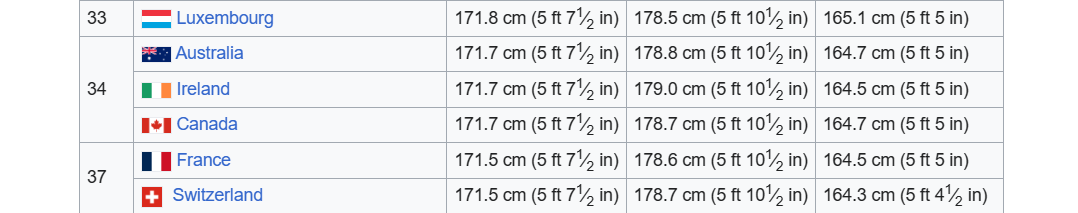

These mean height values will be added as a attribute to the numpy random choice generator and the random generation of data will be generated around a normal distribution from this mean.

A normal distribution is typified by the data being evenly distirbuted around a mean value. The data forming a bell shape with a higher percentage of the data clustering around the mean and tapering off as you move further waway fromt that mean. Weight of a population closely follows this standard normal distribution (Scribbr, 2023).

![Normal Distribution](https://www.scribbr.de/wp-content/uploads/2023/01/standard-normal-distribution-example.webp)

### Weight

Taken from the list of soverign states by Body Mass Index (Wikipedia.2 2023). The World Health Organisation in 2015 gathered data on the average BMI of both male and female adults in Ireland. Ireland placed 33rd on this list with the mean BMI for both males and females listed below

- Males average BMI = 27.9
- Females average BMI = 27.1


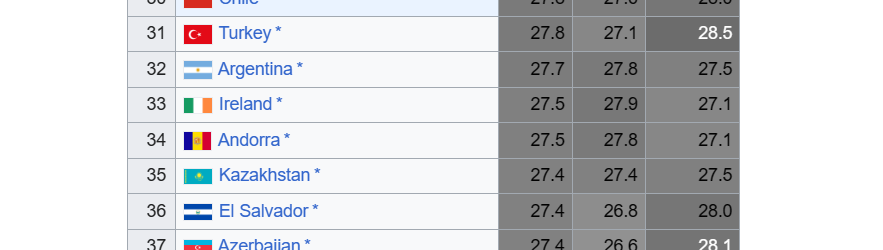

By utilising our Body Mass Index formula we can calculate the mean weight of an average male and female adult by inputting our BMI values and mean average height values we allready gathered.

$$
BodyMassIndex * (Height)^2 = Weight
$$

In [1]:
# Male weight calculation
x = 27.9*(1.79*1.79)
y = "The average mean weight of males in kilograms is"
print(y)
print("%.2f" % round(x, 2))  #Limits floating point number to display only 2 decimal places

The average mean weight of males in kilograms is
89.39


In [2]:
# Female weight calculation
x = 27.1*(1.645*1.645)
y = "The average mean weight of females in kilograms is"
print(y)
print("%.2f" % round(x, 2))  #Limits floating point number to display only 2 decimal places

The average mean weight of females in kilograms is
73.33


### Generation of Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.DataFrame(index = None)                # Creates a dataframe "df" using pandas dataframe function

In [21]:


male_mean_weight, female_mean_weight = 89.39, 73.33                      # Set mean weights

male_mean_height, female_mean_height = 1.79, 1.654                       # set mean height

num_people = 100                                                         # Set number of generated values

seed = 1                                                                 # Seed for reproducibility                                                            

rng = np.random.default_rng(seed=1)

age = []                                                                 # Generate ages
for i in range(num_people):
    a = np.clip(rng.normal(40, 20), 15, 65)                              # normal distribution with mean 40. Clipped values to only show between 15 and 65
    age.append(int(a))

df = pd.DataFrame({"age": age})                                          # Create a DataFrame with the 'age' column

df["gender"] = np.where(rng.random(size=num_people) < 0.49, "male", "female")      # Add a column for gender with a probability of being male

df["weight"] = np.where(df["gender"] == "male",                                    # Add a column for weight based on gender
                        rng.normal(male_mean_weight, 5, size=num_people),
                        rng.normal(female_mean_weight, 5, size=num_people))

df["height"] = np.where(df["gender"] == "male",                                    # Add a column for height based on gender
                        rng.normal(male_mean_height, 0.05, size=num_people),
                        rng.normal(female_mean_height, 0.05, size=num_people))

df["weight"] = df["weight"].round(1)                                               # Round the 'weight' column to one decimal place
df["height"] = df["height"].round(2)                                               # Round the 'height' column to two decimal place


print(df)



    age  gender  weight  height
0    46    male    90.2    1.80
1    56  female    82.3    1.67
2    46  female    71.8    1.66
3    15  female    70.4    1.59
4    58    male    99.5    1.76
..  ...     ...     ...     ...
95   15    male    90.1    1.85
96   37    male    93.3    1.80
97   40    male    90.1    1.80
98   15    male    90.7    1.77
99   46  female    74.3    1.63

[100 rows x 4 columns]


In [22]:
df["gender"]. value_counts()                     # Counts the values in the gender column of the dataframe

male      52
female    48
Name: gender, dtype: int64

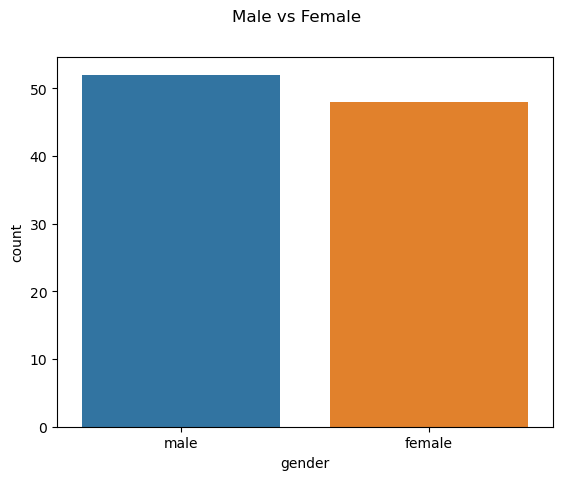

In [23]:
sns.countplot(x = df["gender"])
plt.suptitle ("Male vs Female")
plt.show()

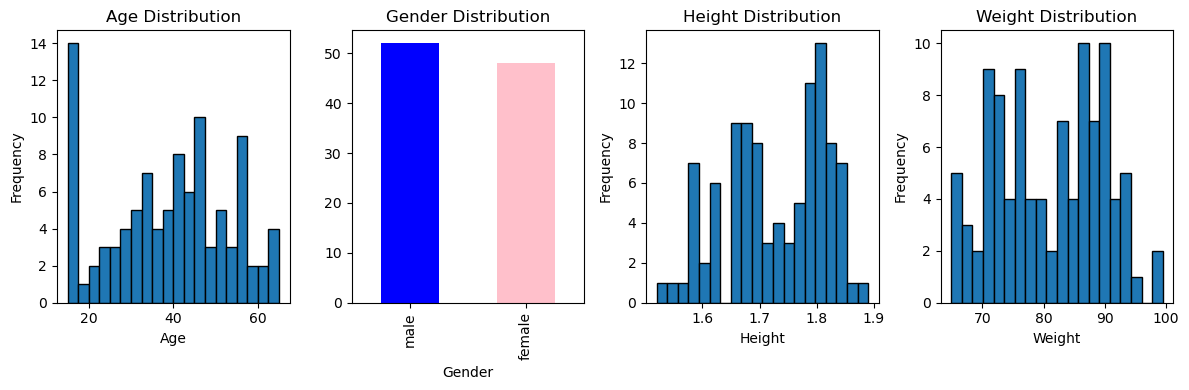

In [25]:
plt.figure(figsize=(12, 4))                                              # Age distribution plot
plt.subplot(1, 4, 1)
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")

plt.subplot(1, 4, 2)                                                     # Gender distribution plot
df["gender"].value_counts().plot(kind="bar", color=["blue", "pink"])
plt.title("Gender Distribution")
plt.xlabel("Gender")

plt.subplot(1, 4, 3)                                                     # Height distribution
df["height"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Height Distribution")
plt.xlabel("Height")

plt.subplot(1, 4, 4)                                                     # Weight distribution
df["weight"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Weight Distribution")
plt.xlabel("Weight")

plt.tight_layout()
plt.show()

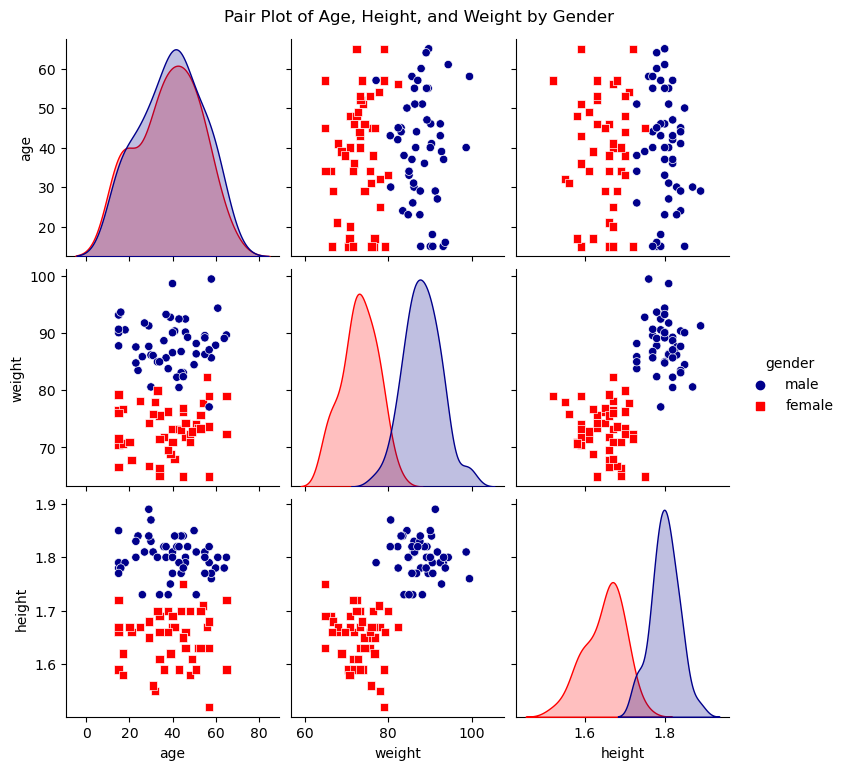

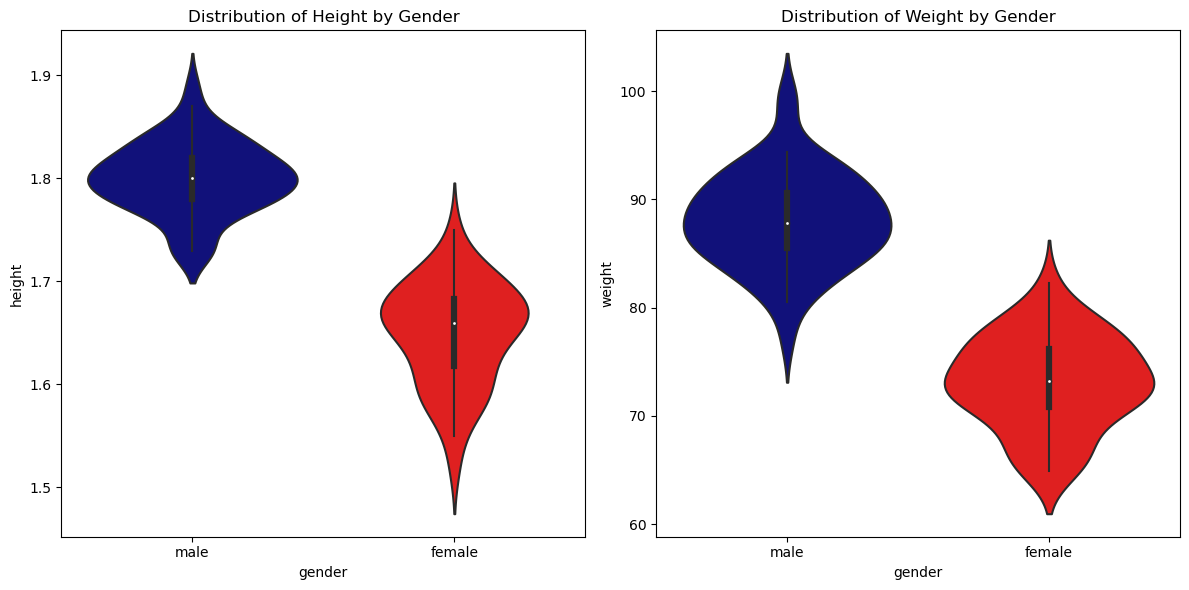

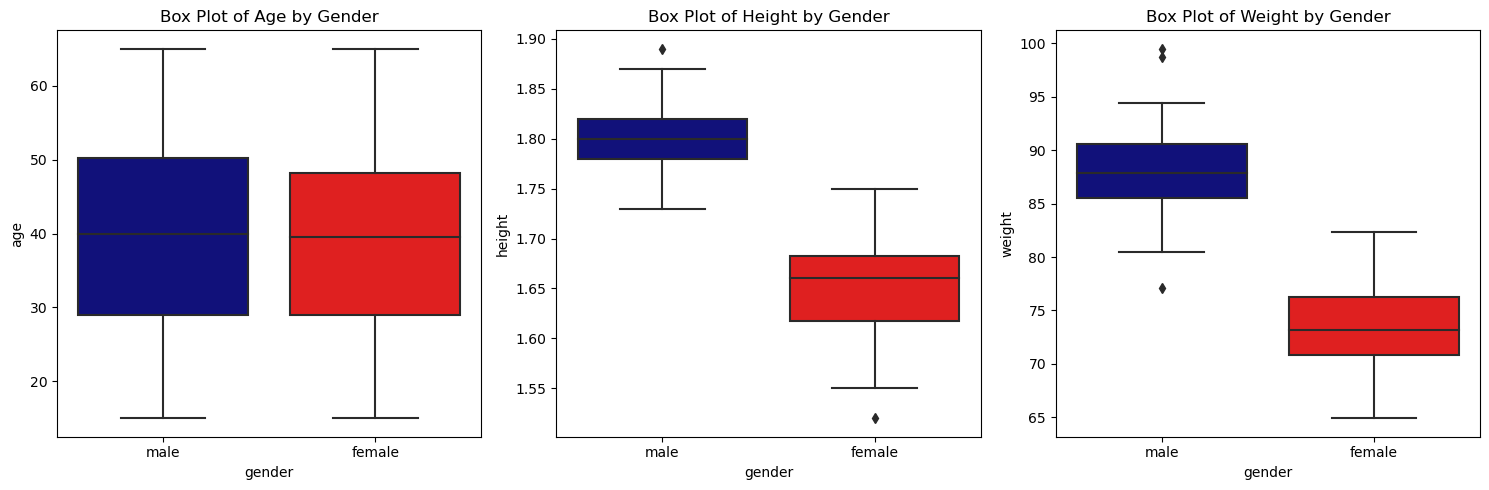

In [27]:
#  Plots using Seaborn

# Pair Plot:  relationships between numerical variables
sns.pairplot(df, hue="gender", markers=["o", "s"], palette={"male": "darkblue", "female": "red"})
plt.suptitle("Pair Plot of Age, Height, and Weight by Gender", y=1.02)
plt.show()

# Violin Plot:  distribution and probability density of height and weight by gender
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x="gender", y="height", data=df, palette={"male": "darkblue", "female": "red"})
plt.title("Distribution of Height by Gender")

plt.subplot(1, 2, 2)
sns.violinplot(x="gender", y="weight", data=df, palette={"male": "darkblue", "female": "red"})
plt.title("Distribution of Weight by Gender")

plt.tight_layout()
plt.show()

# Box Plot:  summary statistics of age, height, and weight by gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="gender", y="age", data=df, palette={"male": "darkblue", "female": "red"})
plt.title("Box Plot of Age by Gender")

plt.subplot(1, 3, 2)
sns.boxplot(x="gender", y="height", data=df, palette={"male": "darkblue", "female": "red"})
plt.title("Box Plot of Height by Gender")

plt.subplot(1, 3, 3)
sns.boxplot(x="gender", y="weight", data=df, palette={"male": "darkblue", "female": "red"})
plt.title("Box Plot of Weight by Gender")

plt.tight_layout()
plt.show()

----------

## References

(Numpy 2022)
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

(CSO 2023)
https://www.cso.ie/en/releasesandpublications/ep/p-ieu50/irelandandtheeuat50/society/population/#:~:text=This%20represents%20a%20percentage%20increase%20of%20almost%2073%25,with%20females%20accounting%20for%2051%25%20of%20the%20population.

(Statista 2023)
https://www.statista.com/statistics/710767/irish-population-by-age/

(Wikipedia.1 2023)
https://en.wikipedia.org/wiki/Average_human_height_by_country

(Wikipedia.2 2023)
https://en.wikipedia.org/wiki/List_of_sovereign_states_by_body_mass_index

(Scribbr, 2023)
https://www.scribbr.com/statistics/normal-distribution/#Why%20Do%20Normal%20Distributions%20Matter?

(StackOverFlow, 2023)
https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points